# Eight Queens Genetic Algorithim

## Basic Implementation

a) Initial Population

In [45]:
import random

def generate_population(number_of_queens=8, size_of_population=19):
    """generates a population of random board states or genotypes
    """
    return [_generate_genotype(number_of_queens) for _ in range(size_of_population)]


def _generate_genotype(number_of_queens):
    return  [random.randrange(number_of_queens) for num in range(number_of_queens )]


generate_population(number_of_queens=3, size_of_population=3)

[[0, 1, 1], [0, 2, 0], [0, 0, 1]]

b) fitness function

In [46]:
def fitness_function(genotype):
    """finds a score based off the number of queens which are not being attacked
    """
    fitness_score = 0

    for i_p, gene in enumerate(genotype):
        for i_o_p, other_gene in enumerate(genotype):
            if gene == other_gene:
                # is on the same row
                continue
            if i_p - gene == i_o_p - other_gene:
                # is diagonally attacked
                continue
            if i_p + gene == i_o_p + other_gene:
                # is diagonally attacked
                continue
            fitness_score += 1
    
    return fitness_score / 2


assert fitness_function([7,1,4,2,0,6,3,5]) == 28
assert fitness_function([7,2,4,2,0,6,3,2]) == 23
assert fitness_function([1,1,1,1,0,6,3,2]) == 19
assert fitness_function([1,1,1,1,1,1,1,1]) == 0
assert fitness_function([1,2,3,4,5,6,7,8]) == 0


c)	selection:

In [47]:
def selection(population, fitness_scores, size_of_population):
    """selects pairs of parents proportional to their fitness scores
    """

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(population, fitness_scores)
        parent_two = _random_weighted_choice(population, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected


def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights
    """

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    # avoid zero weights constraint
    if sum(weights) == 0.0:
        weights[0] = 0.1

    return random.choices(population, weights=weights, k=1)[0]


population = generate_population(3, 5)
fitness_scores = [fitness_function(genotype) for genotype in population]
print("initial populations:")
print(population)
print("fitness scores:")
print(fitness_scores)
print("selected parents")
selection(population, fitness_scores, 3)


initial populations:
[[1, 2, 1], [0, 2, 1], [0, 2, 1], [2, 2, 2], [2, 1, 2]]
fitness scores:
[0.0, 2.0, 2.0, 0.0, 0.0]
selected parents


[([0, 2, 1], [0, 2, 1]), ([0, 2, 1], [0, 2, 1]), ([0, 2, 1], [0, 2, 1])]

d)	Crossover

In [48]:
def crossover(selected_pairs, number_of_queens):
    """crossover parents to produce offspring
    """

    offspring = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        offspring.append(child)

    return offspring


def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]

population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")

crossover(selected_parents, 3)

selected parents
[([1, 1, 0], [1, 2, 2]), ([1, 2, 2], [1, 1, 0]), ([1, 1, 0], [1, 2, 2])]
offspring


[[1, 1, 2], [1, 1, 0], [1, 2, 2]]

e)  mutation

In [49]:
import random

def mutation(population, mutation_frequency, number_of_queens): 
    """mutate values proportional to the mutation frequency
    """

    for genotype in population:
        for s_i,_ in enumerate(genotype):
            x = random.randint(1, mutation_frequency)
            if x == 1:
                genotype[s_i] = _mutate(genotype[s_i], number_of_queens)
    return population


def _mutate(current_value, number_of_queens):
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    return new_value



population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)
offspring = crossover(selected_parents, 3)
print("offspring")
print(offspring)
print("mutated")

mutation(population, 2, 3)

offspring
[[2, 0, 2], [0, 0, 0], [2, 0, 0]]
mutated


[[1, 2, 2], [1, 0, 1], [0, 1, 2]]

check for completion and calclate perfect score

In [50]:
def check_for_perfect_genotype(population, perfect_score):
    for pop in population:
        if fitness_function(pop) == perfect_score:
            return pop

    return []


def calculate_perfect_score(number_of_queens):
    """finds perfect docre for a number of queens
    """
    g = [0 for _ in range(number_of_queens)]

    fitness_score =0

    for i_p, gene in enumerate(g):
        for i_o_p, other_gene in enumerate(g):
            if i_p != i_o_p:
                fitness_score += 1
                continue
    
    return fitness_score / 2

generation

In [51]:

def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


[[1, 1, 1], [2, 2, 2], [2, 2, 2]]

Full algorithim

In [52]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # check if it has found correct state and exit loop
    while not completed_genotype:
        population = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1
        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 6.383237699999881,
 'number_of_generations': 7114,
 'completed_state': [2, 5, 7, 1, 3, 0, 6, 4]}

In [42]:
# run algo on all test populations

import pickle

test_populations_name = 'testpopulations\\test_populations_25'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

elapsed_time:
7.758197799999834
number_of_generations:
9228
completed_state:
[4, 6, 1, 5, 2, 0, 7, 3]
elapsed_time:
5.006152800000564
number_of_generations:
5403
completed_state:
[5, 3, 6, 0, 2, 4, 1, 7]
elapsed_time:
0.521730700000262
number_of_generations:
615
completed_state:
[1, 4, 6, 0, 2, 7, 5, 3]
elapsed_time:
0.4664723000005324
number_of_generations:
571
completed_state:
[1, 3, 5, 7, 2, 0, 6, 4]
elapsed_time:
6.815093900000647
number_of_generations:
7170
completed_state:
[5, 2, 4, 7, 0, 3, 1, 6]
elapsed_time:
12.004474199999095
number_of_generations:
10559
completed_state:
[2, 5, 3, 0, 7, 4, 6, 1]
elapsed_time:
11.240570599999046
number_of_generations:
12669
completed_state:
[2, 4, 7, 3, 0, 6, 1, 5]
elapsed_time:
3.4528138999994553
number_of_generations:
3959
completed_state:
[6, 3, 1, 4, 7, 0, 2, 5]
elapsed_time:
0.027694599999449565
number_of_generations:
23
completed_state:
[4, 6, 0, 2, 7, 5, 3, 1]
elapsed_time:
3.880750899999839
number_of_generations:
4144
completed_state:


{'elapsed_time': [7.758197799999834,
  5.006152800000564,
  0.521730700000262,
  0.4664723000005324,
  6.815093900000647,
  12.004474199999095,
  11.240570599999046,
  3.4528138999994553,
  0.027694599999449565,
  3.880750899999839,
  4.093968700000914,
  3.1113220999995974,
  4.598336200000631,
  5.474566200000481,
  1.3125675999999658,
  1.9348720999987563,
  10.386510899999848,
  4.095518899999661,
  6.073821599999064,
  4.670262700001331,
  7.0037499999998545,
  1.6758843999996316,
  4.0355667999992875,
  8.484672700000374,
  5.335920100000294,
  2.868873100000201,
  4.4320681000008335,
  2.7885600999998132,
  2.378979299999628,
  6.123979599999075,
  3.8001211999999214,
  3.388961200000267,
  0.27406879999944067,
  5.150465000000622,
  0.6634854999992967,
  4.750579400000788,
  2.5729174000007333,
  0.5959354000005987,
  5.4066177000004245,
  1.352949100000842,
  6.474207299999762,
  4.208840799999962,
  3.1268677999996726,
  5.964215500000137,
  1.3715798999983235,
  7.4515701000

In [ ]:
for completed_state in results["completed_state"]:

    if fitness_function(completed_state) < 28:
        print(completed_state)


    elapsed_time  number_of_generations           completed_state
0       7.758198                   9228  [4, 6, 1, 5, 2, 0, 7, 3]
1       5.006153                   5403  [5, 3, 6, 0, 2, 4, 1, 7]
2       0.521731                    615  [1, 4, 6, 0, 2, 7, 5, 3]
3       0.466472                    571  [1, 3, 5, 7, 2, 0, 6, 4]
4       6.815094                   7170  [5, 2, 4, 7, 0, 3, 1, 6]
..           ...                    ...                       ...
95      3.649169                   4329  [4, 0, 3, 5, 7, 1, 6, 2]
96      8.567693                   9043  [3, 6, 4, 1, 5, 0, 2, 7]
97      8.368776                   9911  [4, 1, 3, 5, 7, 2, 0, 6]
98      3.799945                   4314  [4, 0, 3, 5, 7, 1, 6, 2]
99      2.904279                   3387  [4, 0, 7, 3, 1, 6, 2, 5]

[100 rows x 3 columns]
mean_number_of_generations: 4997.44
std_number_of_generations: 4190.326257927751
number_of_generation_range: 23667
mean_elapsed_time: 4.685403311000064
std_elapsed_time: 4.084250153312

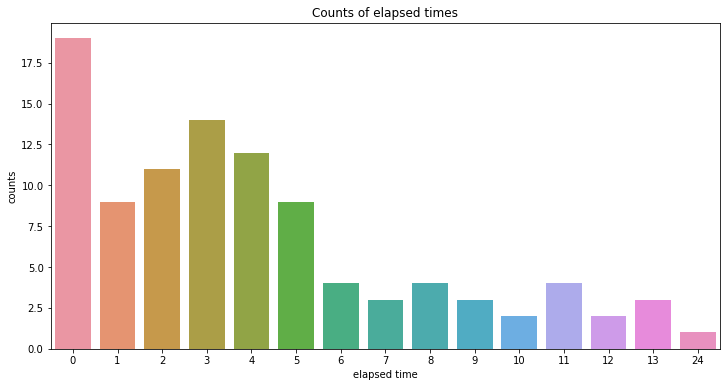

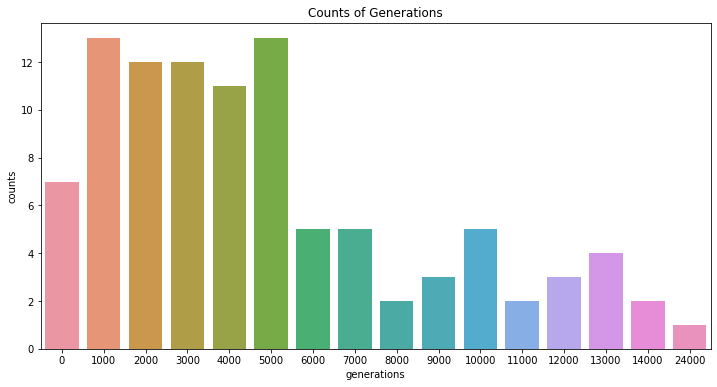

In [44]:
import os

unique_identifier = "100_25-x_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\basic"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()

import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

## range 

et_max = results_df["elapsed_time"].max()
et_min = results_df["elapsed_time"].min()
elapsed_time_range = et_max - et_min

ng_max = results_df["number_of_generations"].max()
ng_min = results_df["number_of_generations"].min()
number_of_generation_range = ng_max - ng_min


print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"number_of_generation_range: {number_of_generation_range}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")
print(f"range_elapsed_time: {elapsed_time_range}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"number_of_generation_range: {number_of_generation_range}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines(f"range_elapsed_time: {elapsed_time_range}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)


<hr>

## Optimised Implementation

d) Tournament Selection

In [54]:
import random
import math

def selection(population, size_of_population, tournament_population_size):
    """return a list of selected pairs"""

    selected = []

    for _ in range(size_of_population):
        selected.append(_tournament_selection(population, tournament_population_size))

    return selected
    

def _tournament_selection(population, tournament_population_size):
    tournament_population = random.choices(population=population, k=tournament_population_size)
    fitness_socres = [(entrant, fitness_function(entrant)) for entrant in tournament_population]
    srted = sorted(fitness_socres, key=lambda x: x[1], reverse=True)

    return srted[0][0], srted[1][0]


e)  Two Point Crossover

In [57]:
import random

def crossover(selected_pairs, number_of_queens):

    offspring = []
    for s_p in selected_pairs:

        parent_one = s_p[0]
        parent_two = s_p[1]   

        # generate random cross over points - 0 - max number of queens
        cross_over_index_one = random.randint(0, number_of_queens - 2)
        cross_over_index_two = random.randint(cross_over_index_one + 1, number_of_queens - 1)
 

        child = _crssover(parent_one, parent_two, cross_over_index_one, cross_over_index_two)
        offspring.append(child)

    return offspring


def _crssover(parent_one, parent_two, cross_over_index_one, cross_over_index_two):
    
    child = parent_one[:cross_over_index_one] + parent_two[cross_over_index_one:cross_over_index_two] + parent_one[cross_over_index_two:]
    
    return child


g) Elitism 

In [58]:

import math
from random import sample

def elitism(population, fitness_scores, elitism_ratio, size_of_population):
    number_of_elites = math.floor(size_of_population * elitism_ratio)
    pop_fitness = [(population[i], fitness_scores[i]) for i in range(len(population))]
    sorted_by_score = sorted(pop_fitness, key=lambda x: x[1], reverse=True)

    return [sorted_by_score[i][0] for i in range(number_of_elites)]


def remove_parent_pairs(population, elitism_ratio, size_of_population):
    """
    """
    number_to_remove = math.floor(size_of_population * elitism_ratio)

    return _remove_n_random_values_from_list(population, number_to_remove)


def _remove_n_random_values_from_list(values, number_to_remove):
    remove = set(sample(range(len(values)),number_to_remove))
    return [value for index,value in enumerate(values) if not index in remove]

Generation

In [63]:
def generation(
            population,
            size_of_population, 
            number_of_queens,
            mutation_frequency,
            tournament_population_size,
            elitism_ratio
        ):
        
    # d) Tournament Selection
    selected_pairs = selection(population, size_of_population, tournament_population_size)
    # make room for elites
    remove_selected_pairs = remove_parent_pairs(selected_pairs, elitism_ratio, size_of_population)
    
    # e) Two point cross over
    children = crossover(remove_selected_pairs, number_of_queens)

    # g) Elitism
    fit_scores = [fitness_function(genotype) for genotype in population]
    elites = elitism(population, fit_scores, elitism_ratio, size_of_population)
    elite_children = elites + children

    fit_scores = [fitness_function(genotype) for genotype in elite_children]

    # f) mutation
    mutated = mutation(elite_children, mutation_frequency, number_of_queens)

    return mutated


population = generate_population(
    size_of_population=8,
    number_of_queens=8
)

generation(
            population=population,
            size_of_population=8, 
            number_of_queens=8, 
            mutation_frequency=8, 
            tournament_population_size=5, 
            elitism_ratio=0.25
    )

[[4, 0, 2, 6, 7, 5, 1, 1],
 [4, 6, 2, 4, 5, 0, 2, 3],
 [4, 0, 2, 3, 5, 0, 2, 3],
 [4, 0, 2, 6, 7, 5, 1, 5],
 [4, 1, 1, 5, 7, 5, 1, 3],
 [2, 4, 1, 1, 7, 0, 6, 4],
 [4, 6, 2, 1, 7, 0, 3, 3],
 [1, 0, 7, 0, 1, 4, 5, 5]]

Full algorithim

In [66]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)
TOURNAMENT_POPULATION_SIZE = 5
ELITISM_RATIO = 0.25


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # check if it has found correct state and exit loop
    while not completed_genotype:
        population = generation(
            population=population,
            size_of_population=SIZE_OF_POPULATION, 
            number_of_queens=NUMBER_OF_QUEENS, 
            mutation_frequency=MUTATION_FREQUENCY, 
            tournament_population_size=TOURNAMENT_POPULATION_SIZE,
            elitism_ratio=ELITISM_RATIO,
        )
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 0.11538839999957418,
 'number_of_generations': 35,
 'completed_state': [5, 3, 0, 4, 7, 1, 6, 2]}

In [69]:
# run algo on all test populations

import pickle

test_populations_name = 'testpopulations\\test_populations_500'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

elapsed_time:
0.05578840000089258
number_of_generations:
17
completed_state:
[3, 0, 4, 7, 5, 2, 6, 1]
elapsed_time:
0.1476414000007935
number_of_generations:
67
completed_state:
[3, 7, 0, 4, 6, 1, 5, 2]
elapsed_time:
0.7927265999987867
number_of_generations:
383
completed_state:
[0, 6, 4, 7, 1, 3, 5, 2]
elapsed_time:
0.1911350999998831
number_of_generations:
99
completed_state:
[2, 6, 1, 7, 5, 3, 0, 4]
elapsed_time:
0.26466310000068916
number_of_generations:
125
completed_state:
[7, 1, 4, 2, 0, 6, 3, 5]
elapsed_time:
0.9029925999984698
number_of_generations:
457
completed_state:
[6, 2, 7, 1, 4, 0, 5, 3]
elapsed_time:
0.4463320999984717
number_of_generations:
231
completed_state:
[2, 5, 3, 0, 7, 4, 6, 1]
elapsed_time:
0.1679999999996653
number_of_generations:
87
completed_state:
[4, 2, 0, 5, 7, 1, 3, 6]
elapsed_time:
0.15471470000011323
number_of_generations:
50
completed_state:
[2, 5, 1, 4, 7, 0, 6, 3]
elapsed_time:
0.0990261000006285
number_of_generations:
46
completed_state:
[3, 5, 0

    elapsed_time  number_of_generations           completed_state
0       0.055788                     17  [3, 0, 4, 7, 5, 2, 6, 1]
1       0.147641                     67  [3, 7, 0, 4, 6, 1, 5, 2]
2       0.792727                    383  [0, 6, 4, 7, 1, 3, 5, 2]
3       0.191135                     99  [2, 6, 1, 7, 5, 3, 0, 4]
4       0.264663                    125  [7, 1, 4, 2, 0, 6, 3, 5]
..           ...                    ...                       ...
95      0.273705                     70  [2, 5, 1, 6, 0, 3, 7, 4]
96      1.240244                    382  [4, 6, 1, 3, 7, 0, 2, 5]
97      0.059704                     21  [5, 2, 6, 1, 7, 4, 0, 3]
98      0.360920                    143  [2, 5, 3, 0, 7, 4, 6, 1]
99      1.217597                    473  [6, 3, 1, 7, 5, 0, 2, 4]

[100 rows x 3 columns]
mean_number_of_generations: 166.2
std_number_of_generations: 211.31727307295517
number_of_generation_range: 1186
mean_elapsed_time: 0.41887379799980407
std_elapsed_time: 0.521057552637

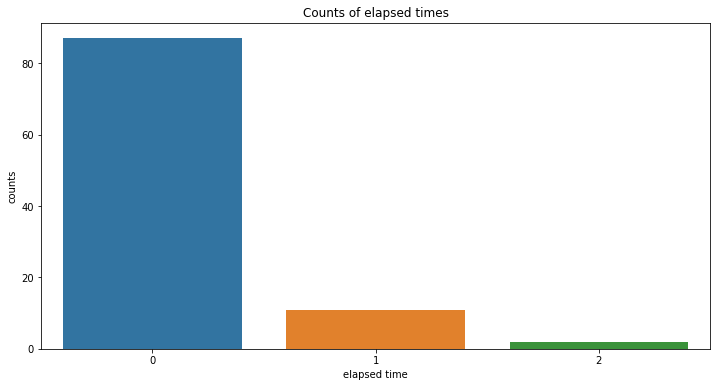

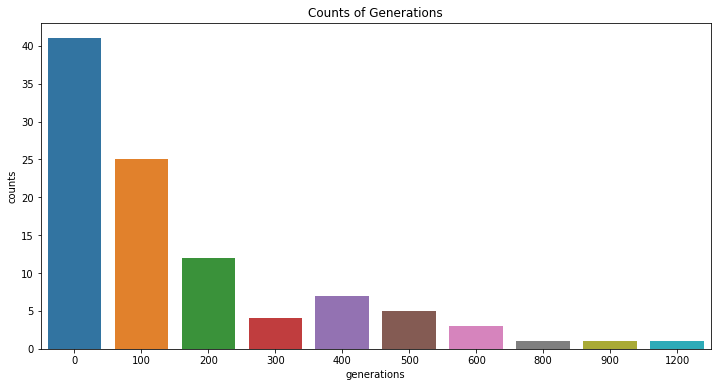

In [70]:
import os

unique_identifier = "100_500-x_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

## range 

et_max = results_df["elapsed_time"].max()
et_min = results_df["elapsed_time"].min()
elapsed_time_range = et_max - et_min

ng_max = results_df["number_of_generations"].max()
ng_min = results_df["number_of_generations"].min()
number_of_generation_range = ng_max - ng_min


print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"number_of_generation_range: {number_of_generation_range}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")
print(f"range_elapsed_time: {elapsed_time_range}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"number_of_generation_range: {number_of_generation_range}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines(f"range_elapsed_time: {elapsed_time_range}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_100(x):
    return round(x, -2) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_100)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)